# DATAMINING

Import danych

# 1.1. Ładowanie datasetu
Dane zostały jebnięte z tego datasetu: https://www.cdc.gov/brfss/annual_data/annual_2020.html

zostały wcześniej przekonwertowane z formatu sas na csv

In [1]:
import pandas as pd

df = pd.read_csv("../data/brfss2020_clean.csv")

In [2]:
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_RFPSA23,_CLNSCPY,_SGMSCPY,_SGMS10Y,_RFBLDS4,_STOLDNA,_VIRCOLN,_SBONTIM,_CRCREC1,_AIDTST4
0,1,1,1042020,1,4,2020,1100,2020000001,2020000001,1.0,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0
1,1,1,2072020,2,7,2020,1200,2020000002,2020000002,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2,1,1,1232020,1,23,2020,1100,2020000003,2020000003,1.0,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0
3,1,1,1092020,1,9,2020,1100,2020000004,2020000004,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,1,1,1042020,1,4,2020,1100,2020000005,2020000005,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401953,72,11,2192021,2,19,2021,1100,2020004940,2020004940,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
401954,72,11,2142021,2,14,2021,1100,2020004941,2020004941,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
401955,72,11,2142021,2,14,2021,1100,2020004942,2020004942,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
401956,72,11,3172021,3,17,2021,1100,2020004943,2020004943,NaN,...,1.0,1.0,3.0,3.0,1.0,3.0,3.0,2.0,1.0,1.0


# 1.2. Inspekcja danych

Funkcja `dataframe_summary` zwraca:
- typy
- liczność
- liczbę unikalnych wartości
- liczbę braków
- odsetek braków
- skośność
- kurtozę
- korelację ze zmienną predykcyjną (jeśli podana).

In [3]:
def dataframe_summary(df, pred=None):
    '''
    Zwraca typy, liczność, liczbę unikalnych wartości, liczbę braków, odsetek braków,
    skośność, kurtozę oraz korelację ze zmienną celu (jeśli podana).
    '''
    summary = pd.DataFrame({
        'types': df.dtypes,
        'counts': df.count(),
        'distincts': df.nunique(),
        'nulls': df.isnull().sum(),
        'missing_ratio (%)': (df.isnull().sum() / df.shape[0]) * 100,
        'skewness': df.skew(numeric_only=True),
        'kurtosis': df.kurt(numeric_only=True)
    })

    summary['uniques'] = [df[col].unique() for col in summary.index]

    if pred is not None and pred in df.columns:
        summary[f'corr {pred}'] = df.corr(numeric_only=True)[pred]

    return summary


## Korelacja dla zmiennych predykcyjnych

Dla danych przeprowadzono analizę statystyczną potencjalnych zmiennych 


- `ADDEPEV3` 
    
    Opisuje czy osoba badana kiedykolwiek posiadała zaburzenia depresyjne (w tym depresję, ciężką depresję, dystymię lub lekką depresję)

|Wartość| Znaczenie                         |
| ----- | --------------------------------- |
| 1     | Tak                             |
| 2     | Nie                             |
| 7     | Nie wiem / Nie jestem pewny(-a) |
| 9     | Odmowa odpowiedzi               |


In [4]:
df["ADDEPEV3"].value_counts()

ADDEPEV3
2.0    324035
1.0     75820
7.0      1476
9.0       621
Name: count, dtype: int64

In [5]:
# Zakładamy, że df to BRFSS 2020 po wczytaniu i wstępnym przetworzeniu
# np. df['ADDEPEV3'] = df['ADDEPEV3'].map({1: 1, 2: 0})

# Wygenerowanie podsumowania względem zmiennej celu
summary_ADDEPEV3 = dataframe_summary(df, pred='ADDEPEV3')

summary_ADDEPEV3

,types,counts,distincts,nulls,missing_ratio (%),skewness,kurtosis,uniques,corr ADDEPEV3
_STATE,int64,401958,53,0,0.000000,0.168148,-0.637796,"[1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, ...",-0.012670
FMONTH,int64,401958,12,0,0.000000,0.197212,-1.281194,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",-0.007086
IDATE,int64,401958,439,0,0.000000,0.054446,-1.268195,"[1042020, 2072020, 1232020, 1092020, 1292020, ...",-0.006642
IMONTH,int64,401958,12,0,0.000000,0.054767,-1.263340,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",-0.006760
IDAY,int64,401958,31,0,0.000000,0.112475,-1.072257,"[4, 7, 23, 9, 29, 30, 5, 18, 20, 8, 27, 15, 6,...",0.005227
...,...,...,...,...,...,...,...,...,...
_STOLDNA,float64,176357,3,225601,56.125516,-3.709040,12.199234,"[3.0, nan, 1.0, 2.0]",0.020666
_VIRCOLN,float64,174274,3,227684,56.643729,-5.402121,28.241651,"[3.0, nan, 1.0, 2.0]",0.020754
_SBONTIM,float64,194217,3,207741,51.682265,-0.299935,-1.544532,"[3.0, 2.0, nan, 1.0]",0.023495
_CRCREC1,float64,175698,3,226260,56.289463,1.424674,0.233231,"[1.0, nan, 2.0, 3.0]",0.030913


- `MENTHLTH`


Zmierzona liczba dni, w których osoba badana odczuwała zły stan zdrowia psychicznego w ciągu ostatnich 30 dni. Pytanie uwzględnia stres, depresję oraz problemy emocjonalne.

| Wartość | Znaczenie                            |
| ------- | ------------------------------------ |
| 0–30  | Liczba dni złego stanu psychicznego  |
| 88    | Brak złych dni                   |
| 77    | Nie wiem / Nie jestem pewny(-a)  |
| 99    | Odmowa odpowiedzi                |
| .     | Brak danych / pytanie nie zadane |


In [6]:
df["MENTHLTH"].value_counts()

MENTHLTH
88.0    255707
30.0     22297
2.0      19591
5.0      16705
10.0     12656
3.0      12500
15.0     12006
1.0      11144
20.0      6544
7.0       6524
4.0       6344
77.0      5833
14.0      2475
25.0      2394
99.0      2091
6.0       1794
8.0       1314
12.0       909
28.0       643
21.0       436
29.0       400
18.0       255
9.0        252
16.0       189
27.0       166
17.0       159
13.0       137
22.0       114
11.0       109
24.0        88
23.0        77
26.0        76
19.0        24
Name: count, dtype: int64

In [7]:
summary_MENTHLTH = dataframe_summary(df, pred='MENTHLTH')

summary_MENTHLTH

,types,counts,distincts,nulls,missing_ratio (%),skewness,kurtosis,uniques,corr MENTHLTH
_STATE,int64,401958,53,0,0.000000,0.168148,-0.637796,"[1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, ...",0.010233
FMONTH,int64,401958,12,0,0.000000,0.197212,-1.281194,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",-0.026440
IDATE,int64,401958,439,0,0.000000,0.054446,-1.268195,"[1042020, 2072020, 1232020, 1092020, 1292020, ...",-0.028757
IMONTH,int64,401958,12,0,0.000000,0.054767,-1.263340,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",-0.028769
IDAY,int64,401958,31,0,0.000000,0.112475,-1.072257,"[4, 7, 23, 9, 29, 30, 5, 18, 20, 8, 27, 15, 6,...",0.002050
...,...,...,...,...,...,...,...,...,...
_STOLDNA,float64,176357,3,225601,56.125516,-3.709040,12.199234,"[3.0, nan, 1.0, 2.0]",0.013283
_VIRCOLN,float64,174274,3,227684,56.643729,-5.402121,28.241651,"[3.0, nan, 1.0, 2.0]",0.007037
_SBONTIM,float64,194217,3,207741,51.682265,-0.299935,-1.544532,"[3.0, 2.0, nan, 1.0]",0.007470
_CRCREC1,float64,175698,3,226260,56.289463,1.424674,0.233231,"[1.0, nan, 2.0, 3.0]",0.003890


# 1.3. Data cleaning

Usunięcie danych z pustymi kolumnami

1. Czyszczenie zmiennej `ADDEPEV3` (czy kiedykolwiek zdiagnozowano depresję)

Mapa wartości:
1 = Tak → 1
2 = Nie → 0
7, 9 = brak danych

In [8]:
df = df[df['ADDEPEV3'].isin([1, 2])].copy()


2. Czyszczenie zmiennej MENTHLTH (liczba dni złego stanu psychicznego)

Wartości 77, 99, NaN → brak danych
Wartość 88 = 0 dni (czyli brak złego samopoczucia)

In [9]:
df['MENTHLTH'] = df['MENTHLTH'].replace({77: pd.NA, 99: pd.NA, 88: 0})
df['MENTHLTH'] = pd.to_numeric(df['MENTHLTH'], errors='coerce')

In [10]:
# # Opcjonalnie – stworzenie zmiennej binarnej: czy było więcej niż 14 dni złego samopoczucia
# df['MENTH14'] = (df['MENTHLTH'] > 14).astype(int)

Oczyszczenie zmiennych jakościowych:
Zmienne jakościowe – zmień wartości 7 i 9 na NaN

In [11]:
qual_vars = ['SEXVAR', 'SMOKE100', 'EXERANY2', 'DIABETE4', 'EDUCA', 'EMPLOY1']

for col in qual_vars:
    df[col] = df[col].replace({7: pd.NA, 9: pd.NA})

In [12]:
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_RFPSA23,_CLNSCPY,_SGMSCPY,_SGMS10Y,_RFBLDS4,_STOLDNA,_VIRCOLN,_SBONTIM,_CRCREC1,_AIDTST4
0,1,1,1042020,1,4,2020,1100,2020000001,2020000001,1.0,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0
1,1,1,2072020,2,7,2020,1200,2020000002,2020000002,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2,1,1,1232020,1,23,2020,1100,2020000003,2020000003,1.0,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0
3,1,1,1092020,1,9,2020,1100,2020000004,2020000004,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,1,1,1042020,1,4,2020,1100,2020000005,2020000005,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401953,72,11,2192021,2,19,2021,1100,2020004940,2020004940,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
401954,72,11,2142021,2,14,2021,1100,2020004941,2020004941,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
401955,72,11,2142021,2,14,2021,1100,2020004942,2020004942,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
401956,72,11,3172021,3,17,2021,1100,2020004943,2020004943,NaN,...,1.0,1.0,3.0,3.0,1.0,3.0,3.0,2.0,1.0,1.0


# 1.4. Data visualistion

## Checking outliers

C:\Users\adamw\AppData\Local\Temp\ipykernel_28556\2547669204.py:30: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\adamw\miniforge3\envs\ai\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


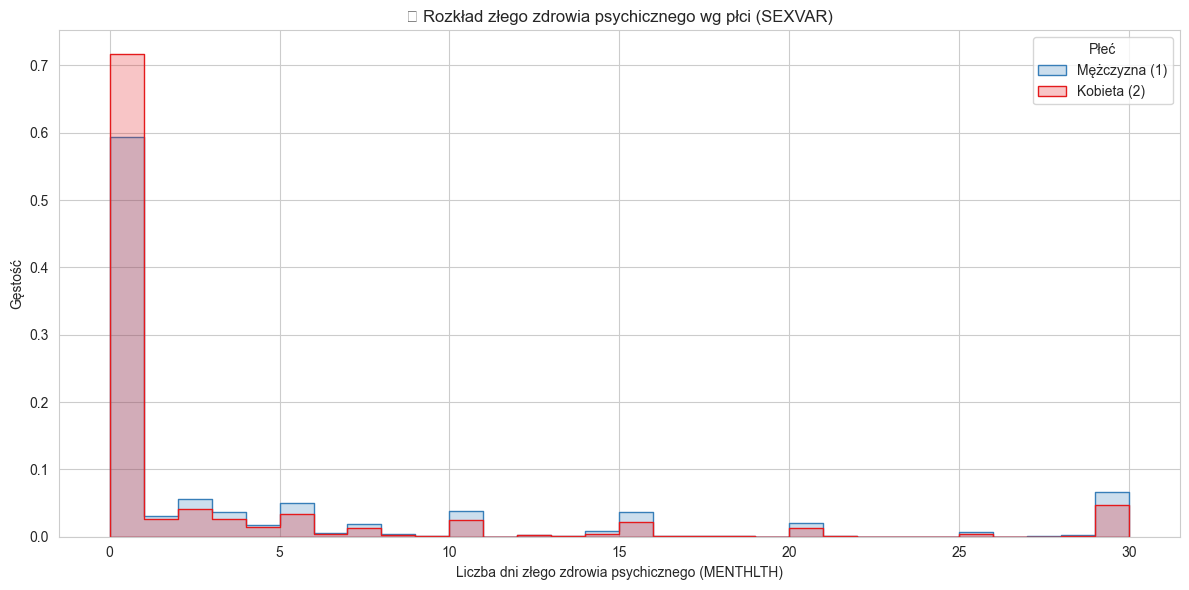

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Zakładamy, że zmienne są już oczyszczone (MENTHLTH numeryczna, bez 77/99/NaN)
df_plot = df.copy()
df_plot = df_plot.sort_values(by='MENTHLTH')

# Przygotowanie danych: usunięcie braków
df_plot = df[['MENTHLTH', 'SEXVAR']].dropna()

# Histogram: rozkład liczby dni złego samopoczucia wg płci
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_plot,
    x="MENTHLTH",
    hue="SEXVAR",
    bins=30,
    element="step",
    stat="density",
    common_norm=False,
    palette="Set1"
)

# Oś X i legenda
plt.xlabel("Liczba dni złego zdrowia psychicznego (MENTHLTH)")
plt.ylabel("Gęstość")
plt.title("🔍 Rozkład złego zdrowia psychicznego wg płci (SEXVAR)")
plt.legend(title="Płeć", labels=["Mężczyzna (1)", "Kobieta (2)"])
sns.set_style("whitegrid")
plt.tight_layout()
plt.show()



<Axes: xlabel='EDUCA', ylabel='MENTHLTH'>

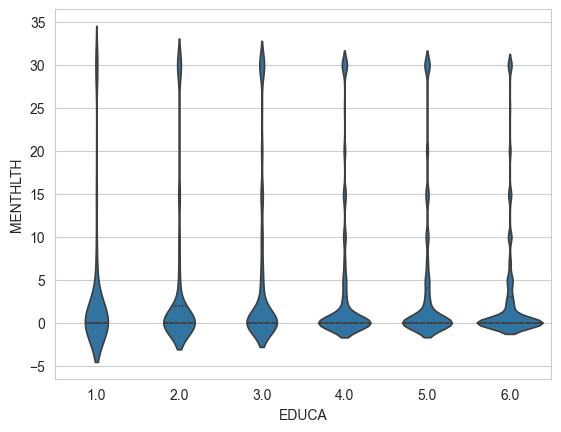

In [21]:
df_plot = df[['MENTHLTH', 'EDUCA']].dropna()
sns.violinplot(data=df_plot, x='EDUCA', y='MENTHLTH', inner='quartile')

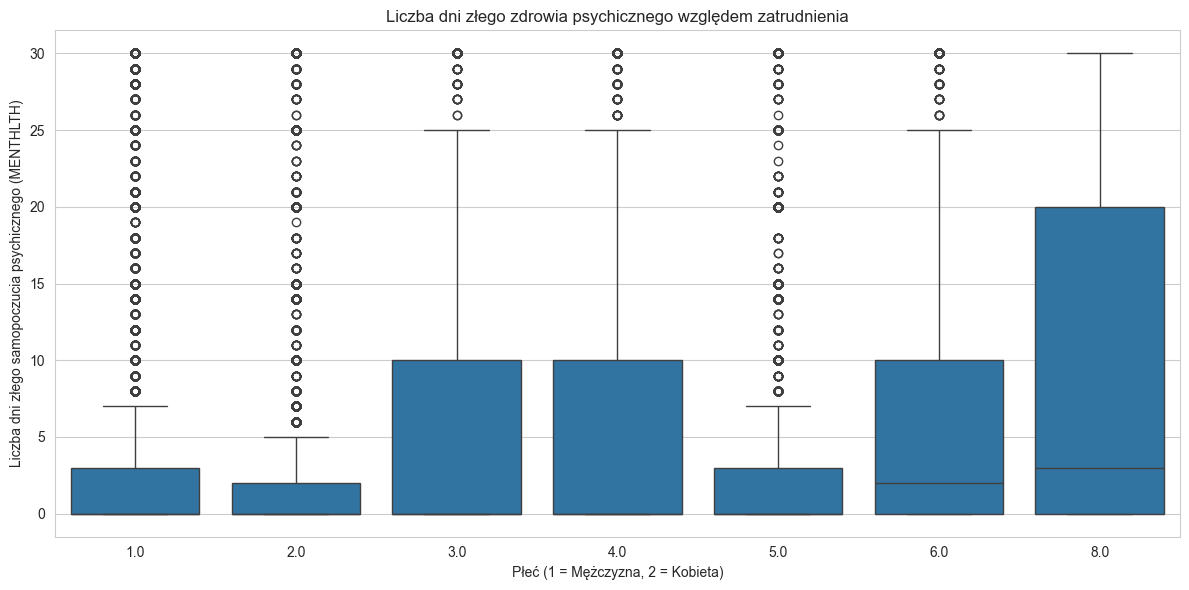

In [14]:
df_plot = df[['EMPLOY1', 'MENTHLTH']].dropna(subset=['EMPLOY1', 'MENTHLTH'])
plt.figure(figsize=(12, 6))
sns.boxplot(x='EMPLOY1', y='MENTHLTH', data=df_plot)

plt.title('Liczba dni złego zdrowia psychicznego względem zatrudnienia')
plt.xlabel('Płeć (1 = Mężczyzna, 2 = Kobieta)')
plt.ylabel('Liczba dni złego samopoczucia psychicznego (MENTHLTH)')
sns.set_style('whitegrid')
plt.tight_layout()
plt.show()

In [ ]:
# # Wybrane zmienne z dokumentacji, które mają sens liczbowy
# cols_to_plot = [
#     '_AGE80', 'BMI5', 'MENTHLTH', 'PHYSHLTH',
#     'SLEPTIM1', 'NUMADULT', 'NUMMEN', 'NUMWOMEN'
# ]

# # Filtrowanie danych i usunięcie braków
# df_viz = df[cols_to_plot].replace({77: pd.NA, 88: 0, 99: pd.NA}).dropna()

# # Tworzenie siatki wykresów
# n = len(cols_to_plot)
# ncols = 2
# nrows = math.ceil(n / ncols)

# fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, nrows * 4))
# axes = axes.flatten()

# for i, col in enumerate(cols_to_plot):
#     sns.histplot(df_viz[col], bins=30, kde=True, ax=axes[i], color='steelblue')
#     axes[i].set_title(f'{col} – Histogram + KDE')
#     axes[i].set_xlabel('')
#     axes[i].set_ylabel('')
#     axes[i].tick_params(labelsize=9)

# # Usuwanie pustych osi
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# plt.suptitle("📊 Rozkłady wybranych zmiennych BRFSS (Histogram + KDE)", fontsize=16, y=1.02)
# plt.show()


KeyError: "['BMI5'] not in index"

# 2. Selekcja zmiennych

# 2.1. Analiza ANOVA
ANOVA to test statystyczny używany do sprawdzenia, czy występują istotne różnice między średnimi trzech lub więcej grup, tj. analiza wariancji. Pomaga nam ustalić, czy zmiany w danych są spowodowane różnymi czynnikami (zdrowie, edukacja, itp).


Jest dobrym narzędziem do oceny związku między:

- zmienną zależną (predykcyjną) – czyli tym, co próbujesz przewidzieć (output, target), 
- a zmienną niezależną (wejściową) – czyli cechami wejściowymi (input features, explanatory variables). 

In [23]:
from scipy.stats import f_oneway

# Upewnij się, że brakujące wartości są poprawnie ustawione
df['MENTHLTH'] = df['MENTHLTH'].replace({77: pd.NA, 99: pd.NA})

# Lista zmiennych kandydujących: niskie zróżnicowanie → kategoryczne
exclude_cols = ['MENTHLTH']
categorical_cols = [
    col for col in df.columns 
    if col not in exclude_cols and df[col].nunique(dropna=True) <= 15
]

# Wyniki ANOVA
anova_results = []

for col in categorical_cols:
    try:
        data = df[[col, 'MENTHLTH']].dropna()
        groups = [grp['MENTHLTH'] for _, grp in data.groupby(col)]
        if len(groups) > 1:
            f_stat, p_val = f_oneway(*groups)
            anova_results.append({
                'Variable': col,
                'F-statistic': round(f_stat, 4),
                'p-value': round(p_val, 6),
                'N groups': len(groups)
            })
    except Exception as e:
        continue  # Pomija zmienne, które powodują błąd (np. same NaN)

# Posortuj wyniki po istotności
anova_df = pd.DataFrame(anova_results).sort_values(by='p-value')
anova_df

,Variable,F-statistic,p-value,N groups
0,FMONTH,39.8122,0.000000,12
1,IMONTH,57.5505,0.000000,12
7,NUMADULT,26.1370,0.000000,15
12,CELLSEX,3454.2659,0.000000,2
11,RESPSLCT,361.7772,0.000000,2
...,...,...,...,...
122,CSRVRTRN,0.3910,0.759464,4
5,LADULT1,0.0746,0.784783,2
4,PVTRESD1,0.0338,0.854087,2
92,DIABEDU,0.1675,0.918330,4
